<a href="https://colab.research.google.com/github/DoctorDroid/NLP/blob/main/Copy_of_Unit_4_Sprint_1_Natural_Language_Processing_Study_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Build-Week-PT-Med-Cabinet-2/DS/main/Marijuana.csv')
print('Shape:', df.shape, '\n')
df.drop(columns= ['Unnamed: 0', 'id'], axis = 1, inplace= True) 
df.head()

Shape: (971, 10) 



,Strain,Type,Rating,Effects_x,Flavor,Description,Effects_y,Ailment
0,100 OG,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,Focused,Depression
1,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,"Uplifted, Relaxed, Energetic, Creative, Dry Mo...","Stress, Pain, Depression, Inflammation"
2,303 OG,indica,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",The indica-dominant 303 OG is a Colorado strai...,"Relaxed, Happy, Focused, Hungry, Euphoric, Dry...","Stress, Pain, Depression, Insomnia"
3,3D CBD,sativa,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",3D CBD from Snoop Dogg’s branded line of canna...,"Relaxed, Happy, Uplifted, Sleepy, Tingly, Dry ...","Pain, Stress, Inflammation, Depression"
4,3X CRAZY,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet","Also known as Optimus Prime, the indica-domina...","Relaxed, Happy, Uplifted, Euphoric, Creative, ...","Stress, Insomnia, Pain, Depression, Lack of Ap..."


# Tokens

## Definitions

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Natural Language Processing**: `A type of computer programming that makes sense of human spoken or written words in a way that can be understood by computers in order to perform certain tasks.`

**Token**: `An instance of a characters in a particular order. More simplistically, a single word or number.`

**Corpus**: `A collection of all tokens found in a document or collection of documents`

**Stopwords**: `Common words that generally add no substance to the logical breakdown of words. i.e. The, an, a, Mr. Mrs. have`
**Statistical Trimming**: `Your Answer Here`

**Stemming**: `changing words to their stem by removing common prefixes and suffixes. Words like wanting, wanted, and wants would all become want`

**Lemmatization**: `converting words into their base meanings. Words such as 'were, was, am, and is' would all be converted to 'be'`

**Vectorization**: `a more complex conversion of words into their associated vector representation. these representations not only take into account the word meaning, but how often those wors are found in context with other, sourounding words. In this manner, Dog would be closer to Cat than it would to Log or Dig`

## Questions of Understanding

1. What are at least 4 common cleaning tasks you need to do when creating tokens?
 1. `Removing formatting such as HTML tags`
 2. `Removing Emails`
 3. `Removing non alpha-numeric characters`
 4. `Removing extra whitespace`

2. Why is it important to apply custom stopwords to our dataset in addition to the ones that come in a library like spaCy?
```
Sometimes there are commonly found words in our documents that the basic english stop words do not account for. For instance, while dealing with trading articles, you may find the word 'pips' and 'pip' mentioned quite a lot. On the other hand, there are times where certain words may be important to keep, like 'Almost' makes a huge difference when speaking about reaching company goals.
```

3. Explain the tradeoffs between statistical trimming, stemming, and lemmatizing.
```
Your Answer Here
```

4. Why do we need to vectorize our documents?
```
For a model to be able to use the data, it must be converted into something on which mathmatical operations can be performed. 
```

## Practice Problems

Write a function to tokenize the `Description` column. Make sure to include the following:
- Return the tokens in an iterable structure
- Normalize the case
- Remove non-alphanumeric characters such as punctuation, whitespace, unicode, etc.
- Apply stopwords and make sure to add stopwords specific to this dataset
- Lemmatize the tokens before returning them

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from collections import Counter
tqdm.pandas()
#!python -m spacy download en_core_web_lg

In [5]:
nlp = spacy.load("en_core_web_lg")

In [6]:
# 1. Remove new line characters
df['clean_text'] = df['Description'].apply(lambda x: re.sub('\s+', ' ', x))

# 2. Remove Emails
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub('From: \S+@\S+', '', x))

# 3. Remove non-alphanumeric characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

# 4. Remove extra whitespace 
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join(x.split()))

def get_lemmas(x):
    lemmas = []
    for token in nlp(x):
        if (token.is_stop!=True) and (token.is_punct!=True):
            lemmas.append(token.lemma_)
    return lemmas

df['lemmas'] = df['clean_text'].progress_apply(get_lemmas)



100%|███████████████████████████████████████████████████| 971/971 [00:32<00:00, 30.12it/s]


In [7]:
def tokenize(df, column):
  df['tokens']= df[column].apply(lambda x: nlp.tokenizer(x))
  return df

Apply your function to `Description` and save the resulting tokens in a new column, `Tokens`

In [8]:
df = tokenize(df, 'clean_text')

In [9]:
df['tokens'].head()

0    (OG, is, a, hybrid, strain, that, packs, a, st...
1    (is, a, sativa, dominant, hybrid, bred, in, Sp...
2    (The, indica, dominant, OG, is, a, Colorado, s...
3    (D, CBD, from, Snoop, Dogg, s, branded, line, ...
4    (Also, known, as, Optimus, Prime, the, indica,...
Name: tokens, dtype: object

Use the function below to create a `word_count` dataframe based off the `df['Tokens']` column you created.

In [10]:
def count(docs):
        word_counts = Counter()
        appears_in = Counter()
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [11]:
word_count = count(df['tokens'])
word_count

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
25,OG,1,1,1.0,0.000015,0.000015,0.00103
5,is,1,1,2.0,0.000015,0.000030,0.00103
48,a,1,1,3.0,0.000015,0.000044,0.00103
29,hybrid,1,1,4.0,0.000015,0.000059,0.00103
3,strain,1,1,5.0,0.000015,0.000074,0.00103
...,...,...,...,...,...,...,...
67530,Description,1,1,67531.0,0.000015,0.999941,0.00103
67531,Available,1,1,67532.0,0.000015,0.999956,0.00103
67532,No,1,1,67533.0,0.000015,0.999970,0.00103
67533,Description,1,1,67534.0,0.000015,0.999985,0.00103


Run the line of code below, and then explain how to interpret the graph.

```
Your Answer Here
```

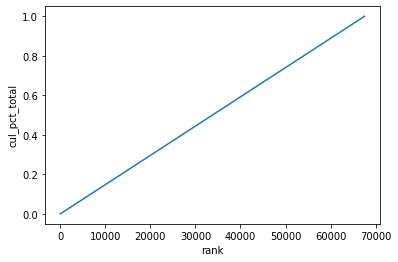

In [36]:
sns.lineplot(x='rank', y='cul_pct_total', data=word_count);

# Vectorization

## Definitions

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Vectorization**: `Your Answer Here`

**Document Term Matrix (DTM)**: `Your Answer Here`

**Latent Semantic Analysis**: `Your Answer Here`

**Term Frequency - Inverse Document Frequency (TF-IDF)**: `Your Answer Here`

**Word Embedding**: `Your Answer Here`

**N-Gram**: `Your Answer Here`

**Skip-Gram**: `Your Answer Here`

## Questions of Understanding

1. Why do we need to vectorize our documents?
```
Your Answer Here
```

2. How is TF-IDF different from simple word frequency? Why do we use TF-IDF over word frequency?
```
Your Answer Here
```

3. Why might we choose a word embedding approach over a bag-of-words approach when it comes to vectorization?
```
Your Answer Here
```

## Practice Problems

Use the dataframe `df` above to complete the following.

Vectorize the `Tokens` column.

Build a Nearest Neighbors model from your dataframe and then find the 5 nearest neighbors to the strain "100-OG"

You will be putting together a classification model below, but before you do you'll need a baseline. Run the line of code below and then find the normalized value counts for the `Rating` column in `df`.

In [ ]:
df['Rating'] = df['Rating'].round().astype(int)

What is the baseline accuracy?
```
Your Answer Here
```

Visualize the rating counts from above

Use your vectorized tokens in the `df` dataframe to train a classification model

Predict the score of the fake strain description below.

```
'Afgooey, also known as Afgoo, is a potent indica strain that is believed to descend from an Afghani indica and Maui Haze. 
Its sativa parent may lend Afgoo some uplifting, creative qualities, but this strain undoubtedly takes after its indica 
parent as it primarily delivers relaxing, sleepy effects alongside its earthy pine flavor. Growers hoping to cultivate Afgoo 
may have a better chance of success indoors, but this indica can also thrive in Mediterranean climates outdoors.'
```

# Topic Modeling

## Questions of Understanding

1. What is Latent Dirichlet Allocation? What is another name for LDA in NLP?
```
Your Answer Here
```

2. How do interpret the results of a topic modeling output?
```
Your Answer Here
```

## Practice Problems

Find the top 5 topics of the `Description` column using LDA

In a short paragraph, explain how to interpret the first topic your model came up with. If your topic words are difficult to interpret, explain how you could clean up the descriptions to improve your topics

```
Your Answer Here
```

Use `pyLDAvis` to create a visualization to help you interpret your topic modeling results

Explain how to interpret the results of `pyLDAvis`

```
Your Answer Here
```

Create at least 1 more visualization to help you interpret the results of your topic modeling